<a href="https://colab.research.google.com/github/gmaciels/TechChallenge/blob/main/Maciel_Fase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

Precisa instalar as seguintes bibliotecas:

*  pip install yfinance
*  pip install LogisticRegression
*   pip install xgboost

In [4]:
# Bibliotecas do sistema
import warnings
from datetime import datetime

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Séries temporais (análise e decomposição)
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Obtenção de dados financeiros
import yfinance as yf

# Modelagem e machine learning
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb

# Pré-processamento e pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Avaliação de modelos
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Validação cruzada
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV

# Importando, tratando e realizando as primeiras visualizações do Dataframe

In [5]:
df = yf.download('^BVSP', period='25y', interval='1d')
df.columns

/tmp/ipython-input-2465969599.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('^BVSP', period='25y', interval='1d')
[*********************100%***********************]  1 of 1 completed


MultiIndex([( 'Close', '^BVSP'),
            (  'High', '^BVSP'),
            (   'Low', '^BVSP'),
            (  'Open', '^BVSP'),
            ('Volume', '^BVSP')],
           names=['Price', 'Ticker'])

In [6]:
df

Price,Close,High,Low,Open,Volume
Ticker,^BVSP,^BVSP,^BVSP,^BVSP,^BVSP
Date,,,,,
2000-10-27,14692.00000,14700.000000,14251.00000,14251.00000,0
2000-10-30,14891.00000,14951.000000,14489.00000,14707.00000,0
2000-10-31,14867.00000,15099.000000,14859.00000,14916.00000,0
2000-11-01,14791.00000,14859.000000,14571.00000,14858.00000,0
2000-11-03,14534.00000,14925.000000,14425.00000,14785.00000,0
...,...,...,...,...,...
2025-10-21,144085.00000,144795.000000,143829.00000,144509.00000,6193200
2025-10-22,144873.00000,145048.000000,144039.00000,144094.00000,7025000


In [7]:
df_ = df[["Close","High",	"Low"	,"Open"	,"Volume"]].dropna().reset_index()
df.columns = ['Último', "Máxima", "Mínima", "Abertura", "Vol."]
df_ibov = df.dropna().copy()

In [8]:
# Visualizando o dataframe
df_ibov

,Último,Máxima,Mínima,Abertura,Vol.
Date,,,,,
2000-10-27,14692.00000,14700.000000,14251.00000,14251.00000,0
2000-10-30,14891.00000,14951.000000,14489.00000,14707.00000,0
2000-10-31,14867.00000,15099.000000,14859.00000,14916.00000,0
2000-11-01,14791.00000,14859.000000,14571.00000,14858.00000,0
2000-11-03,14534.00000,14925.000000,14425.00000,14785.00000,0
...,...,...,...,...,...
2025-10-21,144085.00000,144795.000000,143829.00000,144509.00000,6193200
2025-10-22,144873.00000,145048.000000,144039.00000,144094.00000,7025000
2025-10-23,145721.00000,146358.000000,144881.00000,144881.00000,6599600


In [9]:
# Verificando informações do dataFrame
df_ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6192 entries, 2000-10-27 to 2025-10-27
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    6192 non-null   float64
 1   Máxima    6192 non-null   float64
 2   Mínima    6192 non-null   float64
 3   Abertura  6192 non-null   float64
 4   Vol.      6192 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 290.2 KB


In [10]:
# Verificando valores nulos no dataframe

df_ibov.isnull().sum()

,0
Último,0
Máxima,0
Mínima,0
Abertura,0
Vol.,0


In [11]:
# Convertendo o index em datetime
df_ibov.index = pd.to_datetime(df_ibov.index, format='%d.%m.%Y')

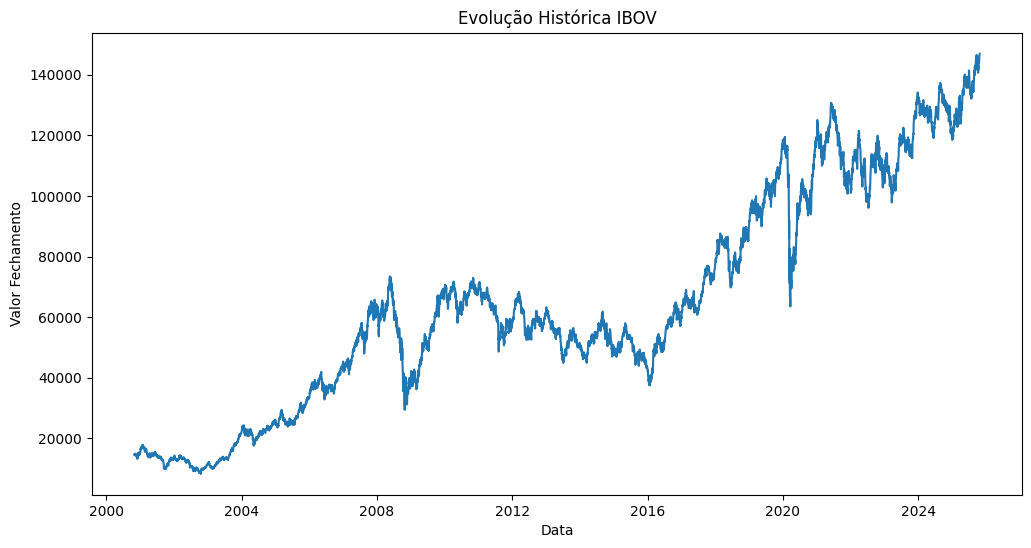

In [12]:
# Plotando meus valores de fechamento para verificar a evolução histórica do IBOV

plt.figure(figsize=(12,6))
plt.plot(df_ibov['Último'])
plt.xlabel('Data')
plt.ylabel('Valor Fechamento')
plt.title('Evolução Histórica IBOV')
plt.show()

*com uma base de 25 anos, pode notar que Ibovespa apresenta grande volatidade, com uma tendencia macro de alta*


# Verificando e transformando minha série em estacionária

In [13]:
# Decompondo meus valores de série temporal
resultados_ibov = seasonal_decompose(df_ibov['Último'],period=252)

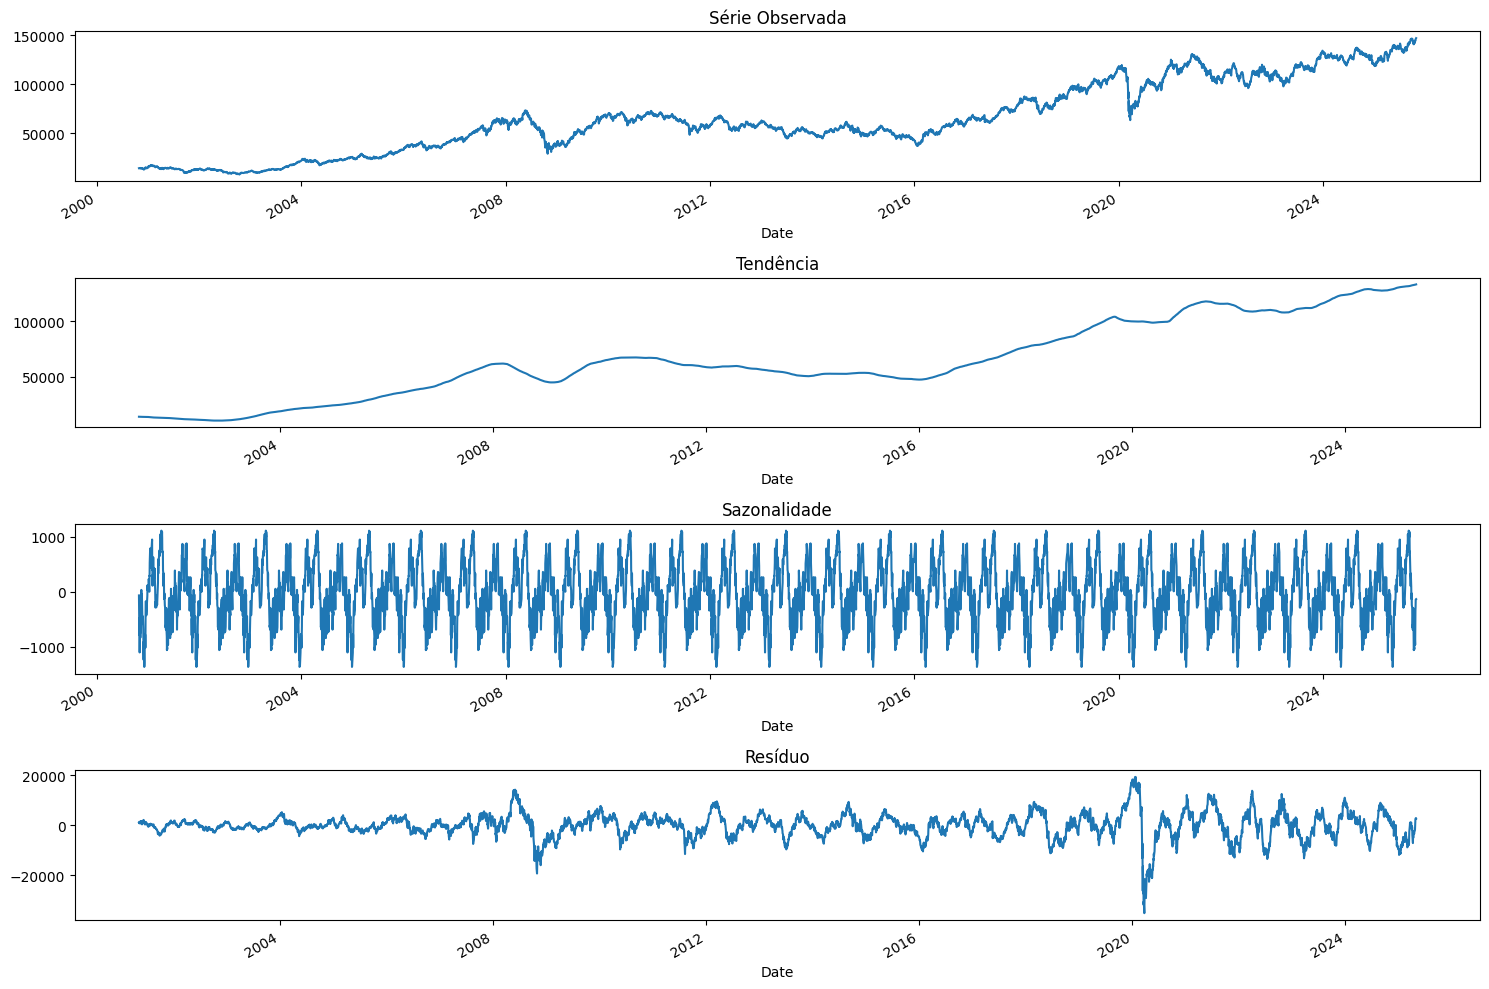

In [14]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,10))

resultados_ibov.observed.plot(ax=ax1)
ax1.set_title("Série Observada")

resultados_ibov.trend.plot(ax=ax2)
ax2.set_title("Tendência")

resultados_ibov.seasonal.plot(ax=ax3)
ax3.set_title("Sazonalidade")

resultados_ibov.resid.plot(ax=ax4)
ax4.set_title("Resíduo")

plt.tight_layout()

plt.show()

**Tendência:** A série demonstra uma trajetória de crescimento ao longo do tempo.

**Sazonalidade:** É possível observar um padrão sazonal que se repete de forma consistente a cada ano, indicando ciclos regulares no comportamento ao longo do tempo.

**Resíduos:** Um ponto de destaque é o desvio expressivo observado em 2020, associado ao impacto da pandemia da COVID-19. Fora isso, os resíduos permanecem relativamente distribuídos em torno de zero, com algumas variações que podem indicar mudanças na volatilidade em determinados períodos.

# Teste de Estacionaridade de Dickey-Fuller

In [15]:
x_ibov = df_ibov['Último'].values

resultados_ibov = adfuller(x_ibov)

print("Teste ADF")
print(f"Teste Estatístico : {resultados_ibov[0]}")
print(f"P - Value : {resultados_ibov[1]}")
print("Valores Criticos:")

for key,value in resultados_ibov[4].items():
  print(f"\t{key}:{value}")

Teste ADF
Teste Estatístico : -0.48323329399577136
P - Value : 0.8952470857590418
Valores Criticos:
	1%:-3.4314085790066406
	5%:-2.862007797113535
	10%:-2.567019005587499


*com esse teste consegui confirmar que a série temporal não é estacionária necessitando tratamento como função logarítmica e/ou diferenciação*

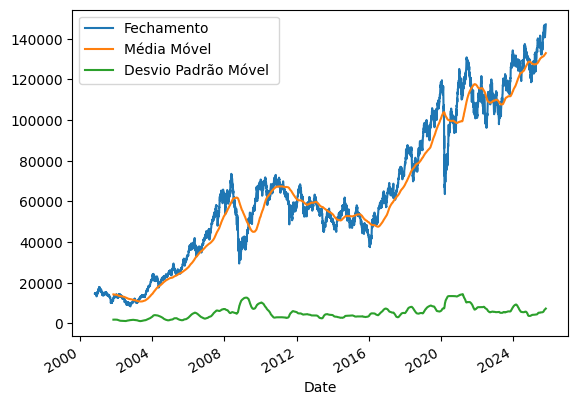

In [16]:
ax = df_ibov['Último'].plot(label="Fechamento")
df_ibov['Último'].rolling(window=252).mean().plot(ax=ax, label="Média Móvel ")
df_ibov['Último'].rolling(window=252).std().plot(ax=ax, label="Desvio Padrão Móvel ")
ax.legend()
plt.show()

In [17]:
#  diferenciação

df_diff = df_ibov['Último'].diff().dropna()
df_ibov_2 = df_ibov.copy().drop(columns=['Último'])
df_ibov_2['Último'] = df_diff.dropna()

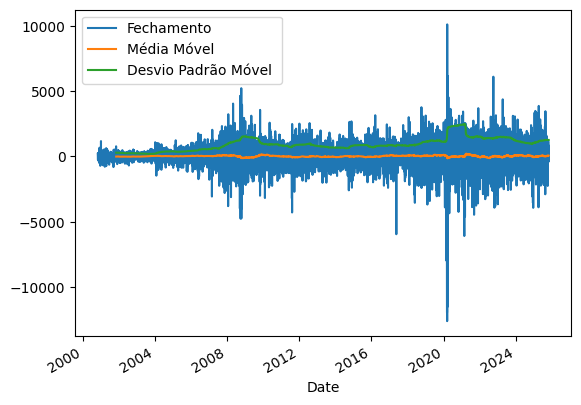

In [18]:
ax = df_ibov_2['Último'].plot(label="Fechamento")
df_ibov_2['Último'].rolling(window=252).mean().plot(ax=ax, label="Média Móvel ")
df_ibov_2['Último'].rolling(window=252).std().plot(ax=ax, label="Desvio Padrão Móvel ")
ax.legend()
plt.show()

In [19]:
# Teste de Estacionariedade — Dickey-Fuller

x_ibov_2 = df_ibov_2['Último'].dropna().values

resultados_ibov_2 = adfuller(x_ibov_2)

print("Teste ADF")
print(f"Teste Estatístico : {resultados_ibov_2[0]}")
print(f"P - Value : {resultados_ibov_2[1]}")
print("Valores Criticos:")

for key,value in resultados_ibov_2[4].items():
  print(f"\t{key}:{value}")

Teste ADF
Teste Estatístico : -21.864332412048025
P - Value : 0.0
Valores Criticos:
	1%:-3.4314085790066406
	5%:-2.862007797113535
	10%:-2.567019005587499


# Verificando minha Autocorrelação

In [22]:
serie_ibov = pd.to_numeric(df_ibov_2['Último'], errors='coerce').dropna()

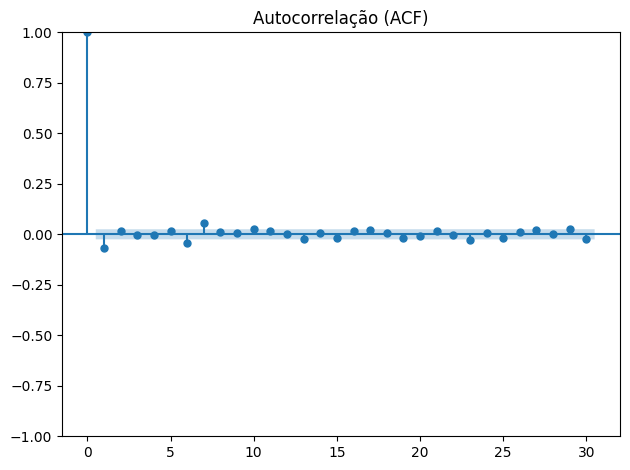

In [23]:
plot_acf(serie_ibov, lags=30)
plt.title("Autocorrelação (ACF)")
plt.tight_layout()
plt.show()

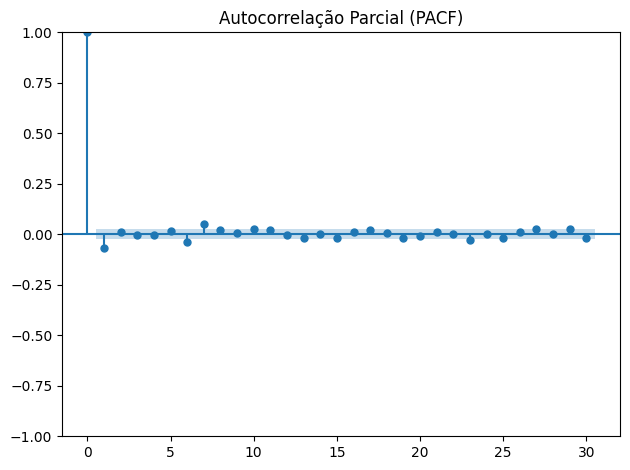

In [24]:
# Autocorrelação parcial
plot_pacf(serie_ibov, lags=30)
plt.title("Autocorrelação Parcial (PACF)")
plt.tight_layout()
plt.show()

In [25]:
lags = range(1, 10)
autocorrelacoes = [serie_ibov.autocorr(lag) for lag in lags]

In [26]:
df_lags = pd.DataFrame({
    'Lag': lags,
    'Autocorrelacao': autocorrelacoes
})

# Ver os lags mais relevantes (por valor absoluto, decrescente)
df_lags['Abs_corr'] = df_lags['Autocorrelacao'].abs()
df_lags = df_lags.sort_values('Abs_corr', ascending=False)

In [27]:
df_lags.head(10)

,Lag,Autocorrelacao,Abs_corr
0,1,-0.066669,0.066669
6,7,0.056409,0.056409
5,6,-0.040649,0.040649
4,5,0.015936,0.015936
1,2,0.015067,0.015067
7,8,0.010895,0.010895
8,9,0.006457,0.006457
3,4,-0.005207,0.005207
2,3,-0.003017,0.003017


*alguns lags que apresentam correlação significativa com o valor atual*

# Criando Features e Target

In [28]:
df_ibov_3 = pd.DataFrame()


In [29]:
df_ibov_3['Fechamento'] = df_ibov_2['Último']
df_ibov_3['Delta'] = df_ibov_3['Fechamento'].pct_change(periods=1).shift(-1)
df_ibov_3

,Fechamento,Delta
Date,,
2000-10-27,NaN,NaN
2000-10-30,199.00000,-1.120603
2000-10-31,-24.00000,2.166667
2000-11-01,-76.00000,2.381579
2000-11-03,-257.00000,-2.038911
...,...,...
2025-10-21,-424.00000,-2.858491
2025-10-22,788.00000,0.076142
2025-10-23,848.00000,-0.468160


In [30]:
# Verificando qual Threshold utilizar para o calculo do meu target

for t in [0.0025, 0.005, 0.0075, 0.01]:
    y_temp = np.where(df_ibov_3['Delta'] > t, 1, np.where(df_ibov_3['Delta'] < -t, 0, np.nan))
    total = len(y_temp[~np.isnan(y_temp)])
    pct_classe_1 = np.sum(y_temp == 1) / total * 100
    pct_classe_0 = np.sum(y_temp == 0) / total * 100
    print(f"Threshold: {t*100:.2f}% → Classe 1: {pct_classe_1:.1f}%, Classe 0: {pct_classe_0:.1f}%")

Threshold: 0.25% → Classe 1: 24.8%, Classe 0: 75.2%
Threshold: 0.50% → Classe 1: 24.8%, Classe 0: 75.2%
Threshold: 0.75% → Classe 1: 24.8%, Classe 0: 75.2%
Threshold: 1.00% → Classe 1: 24.8%, Classe 0: 75.2%


*vou usar 0.5%, que está no meio desse intervalo, como um valor equilibrado*

In [31]:
threshold = 0.005

df_ibov_3['Target'] = np.where(df_ibov_3['Delta'] > threshold, 1, np.where(df_ibov_3['Delta'] < -threshold, 0, np.nan))

In [32]:
df_ibov_3

,Fechamento,Delta,Target
Date,,,
2000-10-27,NaN,NaN,NaN
2000-10-30,199.00000,-1.120603,0.0
2000-10-31,-24.00000,2.166667,1.0
2000-11-01,-76.00000,2.381579,1.0
2000-11-03,-257.00000,-2.038911,0.0
...,...,...,...
2025-10-21,-424.00000,-2.858491,0.0
2025-10-22,788.00000,0.076142,1.0
2025-10-23,848.00000,-0.468160,0.0


In [33]:
# Pegando os 3 lags mais relevantes com base na autocorrelação absoluta
top_lags = df_lags.sort_values('Abs_corr', ascending=False).head(3)['Lag'].tolist()

# Criando colunas de lag da coluna Target com base nesses lags
for lag in top_lags:
    df_ibov_3[f'Target_Lag_{lag}'] = df_ibov_3['Target'].shift(lag)

In [34]:
# Trazendo os valores de máxima e mínima com o deslocamento de 1  dia para tras e o valor de abertura

df_ibov_3['Máxima'] =df_ibov_2['Máxima'].shift(1)
df_ibov_3['Mínima'] = df_ibov_2['Mínima'].shift(1)
df_ibov_3['Abertura'] = df_ibov_2['Abertura']

In [35]:
# Trazendo o valor de volatilidade

df_ibov_3['Volatilidade'] = df_ibov_3['Máxima'] - df_ibov_3['Mínima']
df_ibov_3['Volatilidade_relativa'] = df_ibov_3['Volatilidade'] / df_ibov_3['Mínima']

In [36]:
# Calculando Médias Móveis para compor minhas features considerando as seguintes janelas : 5,22,66 dias com o deslocamento de 1 para trás

df_ibov_3['MA5'] = df_ibov_3['Fechamento'].rolling(window=5).mean().shift(1)

df_ibov_3['MA22'] = df_ibov_3['Fechamento'].rolling(window=22).mean().shift(1)

df_ibov_3['MA66'] = df_ibov_3['Fechamento'].rolling(window=66).mean().shift(1)

*as janelas são dias uteis, seguindo o calendario de pregao da bolsa, o deslocamento de um dia é feito para evitar vazamento de info do futuro no momento da previsão *  

In [37]:
# Finalizando a limpeza e realizando uma copia do meu dataset para aplicação nos modelos

df_ibov_3.drop(['Fechamento','Delta'],axis=1,inplace=True)
df_ibov_3 = df_ibov_3.drop(columns=[col for col in df_ibov_3.columns if 'Target_Lag' in col])

df_ibov_4 = df_ibov_3.dropna().copy()

In [38]:
df_ibov_4


,Target,Máxima,Mínima,Abertura,Volatilidade,Volatilidade_relativa,MA5,MA22,MA66
Date,,,,,,,,,
2001-02-07,0.0,17017.0,16734.0,17003.0,283.0,0.016912,-143.2,15.090909,35.075758
2001-02-08,0.0,17003.0,16630.0,16814.0,373.0,0.022429,-172.2,18.272727,29.106061
2001-02-09,1.0,17279.0,16814.0,17257.0,465.0,0.027656,40.8,30.954545,36.000000
2001-02-12,0.0,17270.0,17050.0,17163.0,220.0,0.012903,44.6,7.363636,35.560606
2001-02-13,0.0,17234.0,16883.0,16922.0,351.0,0.020790,37.2,-0.090909,36.106061
...,...,...,...,...,...,...,...,...,...
2025-10-20,0.0,143425.0,141248.0,143399.0,2177.0,0.015413,543.8,-99.772727,118.696970
2025-10-21,0.0,145216.0,143396.0,144509.0,1820.0,0.012692,545.2,-45.045455,168.590909
2025-10-22,1.0,144795.0,143829.0,144094.0,966.0,0.006716,480.4,-80.909091,150.272727


# Treino e Teste

In [39]:
# Utilizando os últimos 30 dias como teste
train_4 = df_ibov_4.iloc[:-30]
test_4 = df_ibov_4.iloc[-30:]

preditores_4 = list(train_4.columns)
preditores_4.remove('Target')

X_train_4, X_test_4 = train_4[preditores_4], test_4[preditores_4]
y_train_4, y_test_4 = train_4['Target'], test_4['Target']

# Testando Modelos

*   Modelo de Regressao Logistica
*   XGBoost
*   Baseline




# Modelo Baseline

In [40]:
baseline_pred_4 = y_test_4.shift(1).diff().dropna().apply(np.sign) + 1

# calculando a acurácia do baseline
baseline_accuracy_4 = accuracy_score(y_test_4.loc[baseline_pred_4.index], baseline_pred_4)

print(f"Acurácia do baseline: {baseline_accuracy_4:.2f}")

Acurácia do baseline: 0.29


In [41]:
tscv = TimeSeriesSplit(n_splits=5)

# Regressão Logistica

In [42]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000,class_weight='balanced'))])

# Verificando e removendo valores infinitos em X_train_4 e alinhar y_train_4
X_train_4 = X_train_4.replace([np.inf, -np.inf], np.nan).dropna()
y_train_4 = y_train_4.loc[X_train_4.index]


pipe_lr.fit(X_train_4, y_train_4)
y_pred = pipe_lr.predict(X_test_4)

print("Acurácia:", accuracy_score(y_test_4, y_pred))
print("F1:", f1_score(y_test_4, y_pred))
print("Matriz de confusão:\n", confusion_matrix(y_test_4, y_pred))

Acurácia: 0.7333333333333333
F1: 0.0
Matriz de confusão:
 [[22  0]
 [ 8  0]]


# XGBoost

In [44]:
# Balanceando o dataset para o modelo XGBoost
neg, pos = np.bincount(y_train_4.astype(int))
scale_pos_weight = neg / pos

# Criando modelo XGBoost Classifier
model = xgb.XGBClassifier(eval_metric='logloss',scale_pos_weight=scale_pos_weight)

# Treinando o modelo com os dados de treino
model.fit(X_train_4, y_train_4)

# Prevendo as classes
y_pred_xgb = model.predict(X_test_4)

# Prevendo a probabilidade da classe positiva (alta)
y_pred_proba = model.predict_proba(X_test_4)[:, 1]

# Resultados
print("Acurácia:", accuracy_score(y_test_4, y_pred_xgb))
print("F1:", f1_score(y_test_4, y_pred_xgb))
print("Matriz de Confusão:\n", confusion_matrix(y_test_4, y_pred_xgb))
print("\nRelatório de Classificação:\n", classification_report(y_test_4, y_pred_xgb))

Acurácia: 0.7333333333333333
F1: 0.42857142857142855
Matriz de Confusão:
 [[19  3]
 [ 5  3]]

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.79      0.86      0.83        22
         1.0       0.50      0.38      0.43         8

    accuracy                           0.73        30
   macro avg       0.65      0.62      0.63        30
weighted avg       0.71      0.73      0.72        30



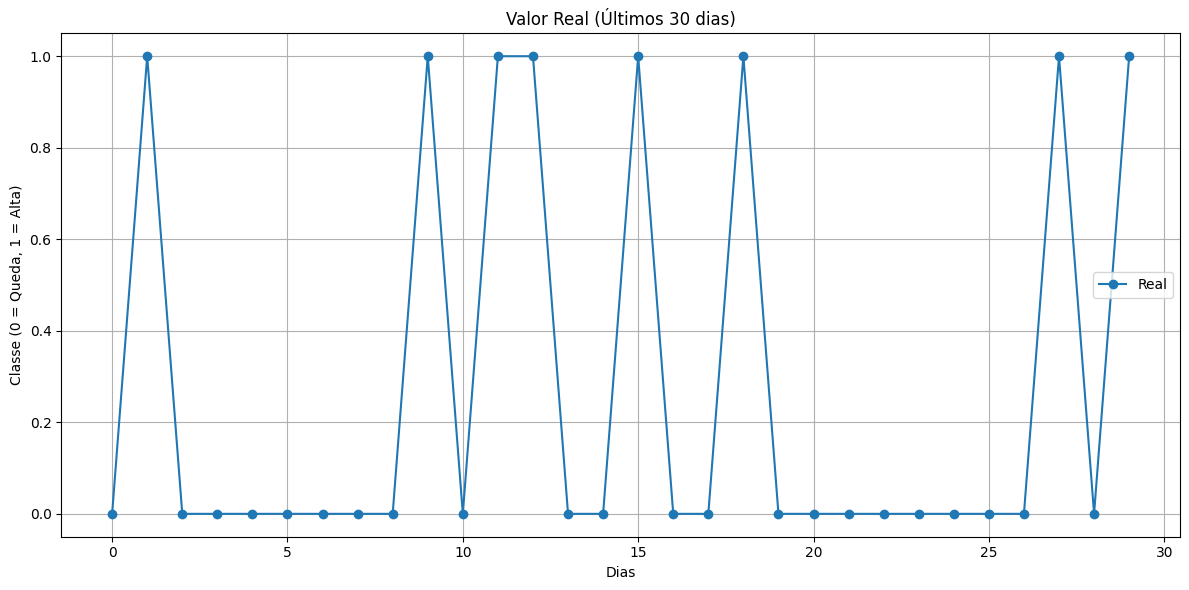

In [45]:
# Plotando valores reais (nos ultimos trinta dias)

plt.figure(figsize=(12,6))
plt.plot(y_test_4.reset_index(drop=True), label='Real', marker='o')
plt.title('Valor Real (Últimos 30 dias)')
plt.xlabel('Dias')
plt.ylabel('Classe (0 = Queda, 1 = Alta)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()